# Final Dataframe Cleanup

The purpose of this notebook is to add additional columns for speaker type to the final_speaker_df.pickle file created in secondary_text_clean_speakers.ipynb.  This notebook will also have the text-preprocessing for NLP of this data.

Importing packages:

In [1]:
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10

Pickling in data:

In [2]:
with open('Data/final_speaker_df.pickle','rb') as read_file:
    speaker_df = pickle.load(read_file)

## Text Cleaning

Removing rows where the speaker is the transcript text exactly (i.e., situations where a topic is listed in italics or bold, such as "Governor Romney's Foreign Policy Agenda).

In [3]:
del_rows = []
for i, transcript in enumerate(speaker_df.Transcript):
    text = transcript.lower().replace('\n', "")
    if text == speaker_df.iloc[i].Speaker.lower():
        del_rows.append(i)
speaker_df.drop(del_rows, inplace=True)
speaker_df.shape

(76495, 6)

Cleaning the speaker column to help with ID'ing the speakers:
- make everything lowercase
- remove common headers like sen., mr., ms., mrs.

In [4]:
for i, speaker in enumerate(speaker_df.Speaker):
    lower_speaker = speaker.lower().strip(".,")
    speaker_df.iloc[i, 3] = lower_speaker.replace("mr. ", "").replace("ms. ", "").replace("mrs. ", "").replace("sen. ", "").replace("gov. ", "").replace("mayor ","").replace("rep. ", "")

In [5]:
speaker_df.head()

,Date,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type
0,"October 11, 1992",The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President
1,"October 11, 1992",The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President
2,"October 11, 1992",The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President
3,"October 11, 1992",The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President
4,"October 11, 1992",The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President


Adding a year column, since that will help with filtering:

In [6]:
speaker_df['Date_Time_Date'] = pd.to_datetime(speaker_df['Date'])
speaker_df.drop(columns=['Date'], inplace=True)

In [7]:
speaker_df['Year'] = speaker_df.Date_Time_Date.dt.year

In [8]:
speaker_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992


In [9]:
speaker_df.shape

(76495, 7)

Removing Transcript rows with "(Applause)" or "(laughter)" as the only text:

In [10]:
del_rows = []
for i, transcript in enumerate(speaker_df.Transcript):
    text = transcript.lower()
    if text == '(laughter)' or text == '(applause)' or text == '(applause.)':
        del_rows.append(i)
speaker_df.drop(del_rows, inplace=True)
speaker_df.shape

(76452, 7)

## Updating Initial Data:

To help with seeing the effects of NLP, I am going to add a column for speaker type (candidate, moderator, etc.).

In [11]:
speaker_df['Speaker_Type'] = 'none_listed'
speaker_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,none_listed
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992,none_listed
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,none_listed
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992,none_listed
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,none_listed


In [12]:
speaker_df.Speaker.value_counts().head(20)

clinton          3336
romney           2796
trump            2432
biden            2406
sanders          2256
mccain           2126
blitzer          2091
obama            2074
paul             1651
bush             1591
cooper           1410
edwards          1319
gore             1296
santorum         1287
moderator        1274
huckabee         1040
king             1029
the president    1006
wallace          1000
gingrich          971
Name: Speaker, dtype: int64

### As a note, I am iterating through the below, entering in the names I get into the right category and then re-running to see who the new names that pop up are.

This list contains a mix of candidates and moderators.  I'll create a database of common republicans, democrats, and moderators from these, to at least get those taken care of:

In [13]:
republicans = ['paul (?)','gary bauer (r), presidential candidate','senator jim demint (r), south carolina','steve forbes','john mccain','kemp','orrin hatch','gary bauer','alan keyes','j. king','reagan','romney. ','nixon','ford','amb. keyes','walker','sen thompson','pawlenty','gilmore','rep. tancredo','palin','tancredo','brownback','hunter','romney.','rep. hunter','mayor giuliani','hatch','quayle','rep. paul','pataki','cheney','senator dole','huntsman','bauer','thompson','jindal','trump', 'romney', 'paul', 'santorum', 'mccain', 'bush', 'gingrich', 'rubio', 'huckabee', 'cruz', 'giuliani', 'kasich', 'bachmann', 'keyes', 'christie', 'forbes', 'cain', 'fiorina', 'pence', 'carson', 'graham', 'perry', 'president bush']
democrats = ['bentsen','ferraro','swalwell','clark','bennet','chafee','hickenlooper','kennedy','webb','dean','williamson','carter','de blasio','inslee','delaney','kerry','gillibrand','gabbard','sharpton','lieberman','dukakis','senator obama','senator clinton','mondale','castro','bloomberg',"o'rourke",'gravel','yang','rep. kucinich','steyer','booker','richardson','bradley','kaine','senator kerry','clinton', 'sanders', 'obama', 'gore', 'edwards', 'biden', 'warren', 'klobuchar', 'buttigieg', ' obama', ' clinton', "o'malley", 'dodd', 'kucinich']
moderators = ['ramos [through translator]','ellis, christian science monitor','john king, cnn correspondent','epperson',"o'brien",'frederick','moyers','ferrechio','q. ','member of audience','calderon','mcelveen','greenfield','goldman','parker','brennan','george','vanocur','(unknown)','hauc','s. king','alcindor','york','davis','distaso','shadel','mcgee','demint','malveaux','arrarás','jackson','nawaz','bullock','baker','hook', 'novak','salinas','lacey','spradling','tumulty','pfannenstiel', 'phillip','newman','alberta','burnett','bachman','announcer','schieffer. ','cameron','unidentified male','cokie roberts','q','question','mitchell','stanton','gregory','crowley','vaughn','koppel',"o'donnell",'sawyer','ramos','bruno','page','matthews','seib','quijano','pelley','garrett','walters','regan','smith','goler','unknown','brown','maccallum','hemmer','cavuto','quick','quintanilla','griffith','rose','welker','schieffer','jennings','guthrie','harwood','washburn','hewitt','ryerson','dickerson','cuomo','lemon','olbermann','ifill','smiley','maddow','bartiromo','williams','diaz-balart','shaw','gibson','woodruff','bash','cooper', 'blitzer', 'moderator', 'king', 'wallace', 'tapper', 'baier', 'mr. blitzer', 'russert', 'stephanopoulos', 'lehrer', 'holt', 'hume', 'todd', 'brokaw', 'muir', 'raddatz', 'kelly']
independents = ['stockdale','perot']

Loop specifically for speaker of "The President:"

In [14]:
for i, speaker in enumerate(speaker_df.Speaker):
    if speaker == 'the president':
        if speaker_df.iloc[i, 6] == 1984:
            speaker_df.iloc[i, 7] = 'Republican'
            speaker_df.iloc[i, 2] = 'reagan'
        elif speaker_df.iloc[i, 6] == 1996:
            speaker_df.iloc[i, 7] = 'Democrat'
            speaker_df.iloc[i, 2] = 'clinton'
        elif speaker_df.iloc[i, 6] == 2012:
            speaker_df.iloc[i, 7] = 'Democrat'
            speaker_df.iloc[i, 2] = 'obama'
        else:
            speaker_df.iloc[i, 7] = 'Republican'
            speaker_df.iloc[i, 2] = 'trump'

Looping through above lists:

In [15]:
for i, speaker in enumerate(speaker_df.Speaker):
    #Kamala Harris and a moderator:
    if speaker == 'harris':
        if speaker_df.iloc[i, 6] == 2011:
            speaker_df.iloc[i, 7] = 'Moderator/Other'
        else:
            speaker_df.iloc[i, 7] = 'Democrat'
    #Paul Ryan in 2012, Tim Ryan in 2019:
    if speaker == 'ryan':
        if speaker_df.iloc[i, 6] == 2012:
            speaker_df.iloc[i, 7] = 'Republican'
        else:
            speaker_df.iloc[i, 7] = 'Democrat'
    #Looping through above lists:
    if speaker in republicans:
        speaker_df.iloc[i,7] = 'Republican'
    elif speaker in democrats:
        speaker_df.iloc[i,7] = 'Democrat'
    elif speaker in moderators:
        speaker_df.iloc[i,7] = 'Moderator/Other'
    elif speaker in independents:
        speaker_df.iloc[i, 7] = 'Independent'
    #Setting a catch all for everyone else as a moderator, since I can't parse through every single one-off line:
    else:
        speaker_df.iloc[i,7] = 'Moderator/Other'

In [16]:
speaker_df['Speaker_Type'].value_counts()

Moderator/Other    27721
Republican         26641
Democrat           22003
Independent           87
Name: Speaker_Type, dtype: int64

Iterating through to see some of the next top names:

In [17]:
filter_df = speaker_df[speaker_df['Speaker_Type'] == 'none_listed']

In [18]:
filter_df.Speaker.value_counts().head(25)

Series([], Name: Speaker, dtype: int64)

**Below is a general formula to plug in and filter names for determining which bucket they are in:**

In [19]:
filter_df[filter_df.Speaker == "kemp"].Date_Time_Date.value_counts()

Series([], Name: Date_Time_Date, dtype: int64)

In [20]:
filter_df[filter_df.Speaker == "kemp"].Debate_Name.value_counts()

Series([], Name: Debate_Name, dtype: int64)

In [21]:
filter_df[filter_df.Speaker == '(applause)'].Data_Source.value_counts()

Series([], Name: Data_Source, dtype: int64)

In [22]:
filter_df[filter_df.Speaker == "gen. chuck yeager (usaf, ret.)"]

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type


Finally, adding a column for line length:

In [23]:
speaker_df['line_length'] = 0
for i, text in enumerate(speaker_df.line_length):
    speaker_df['line_length'].iloc[i] = len(speaker_df.Transcript.iloc[i].split(" "))

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


# Topic Modelling / EDA

At this point, I'll begin topic modelling on the speaker_df dataframe, with the speaker and tags added.  The original workflow I'm using here was stered in secondary_text_clean_eda.

In [24]:
speaker_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type,line_length
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,234
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992,Independent,197
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992,Democrat,106
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7


## EDA - Changes over time

For some initial EDA, I am going to take a look at various changes in response (i.e. transcript text) over time.

### Has the average length of responses changed over time?

In [25]:
line_time = speaker_df.groupby(speaker_df.Year).agg({'line_length':['count', 'mean']})

Plotting the above line_time grouping as a visualization:

In [26]:
X = list(line_time.index)
y = list(line_time.iloc[:,1])

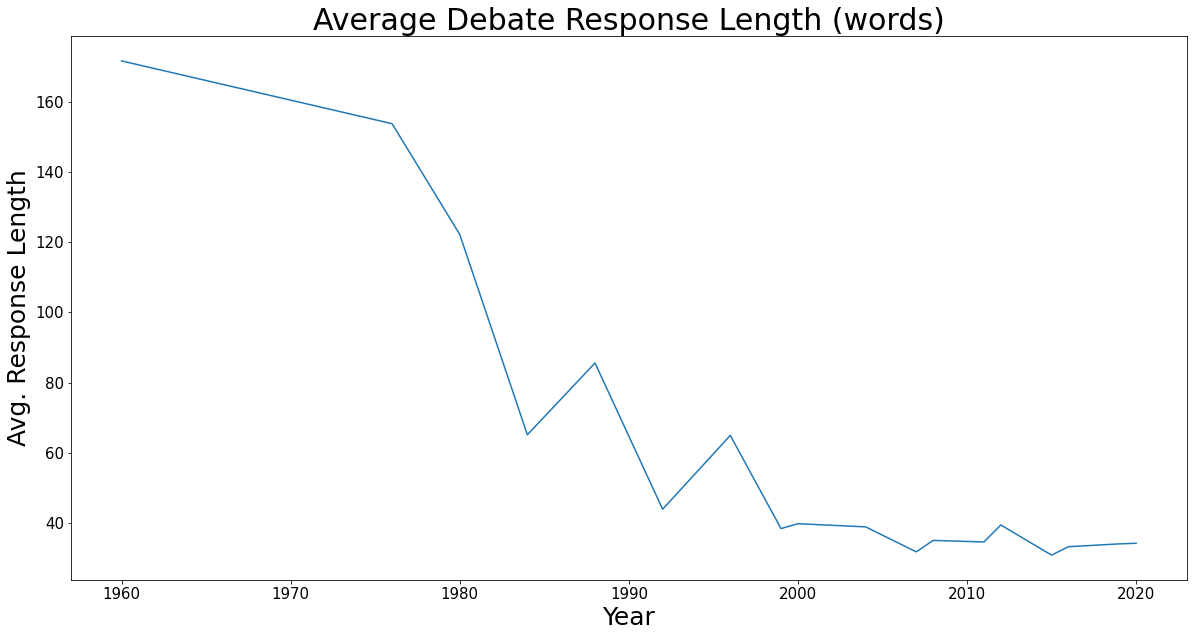

In [27]:
plt.plot(X, y)
plt.xlabel('Year', size=25)
plt.ylabel('Avg. Response Length', size=25)
plt.title('Average Debate Response Length (words)', size=30)
plt.xticks(size=15)
plt.yticks(size=15);

As the above shows, the average line length decreases substantially from 1960 to 2020.  This seems to indicate the presence of more "interjection" between the candidates and moderator.  From 2000-present, it seems like the average has settled right around **40 words**.

### What percent of the lines (rows) are under 40 words?

In [28]:
less_than_40 = speaker_df[speaker_df.line_length <= 40]

In [29]:
line_time_2 = less_than_40.groupby(less_than_40.Year).agg({'line_length':'count'})

In [30]:
percent_df = pd.concat([line_time, line_time_2], axis=1)

In [31]:
percent_df['under_40_rate'] = 100 * percent_df['line_length'] / percent_df[('line_length', 'count')]

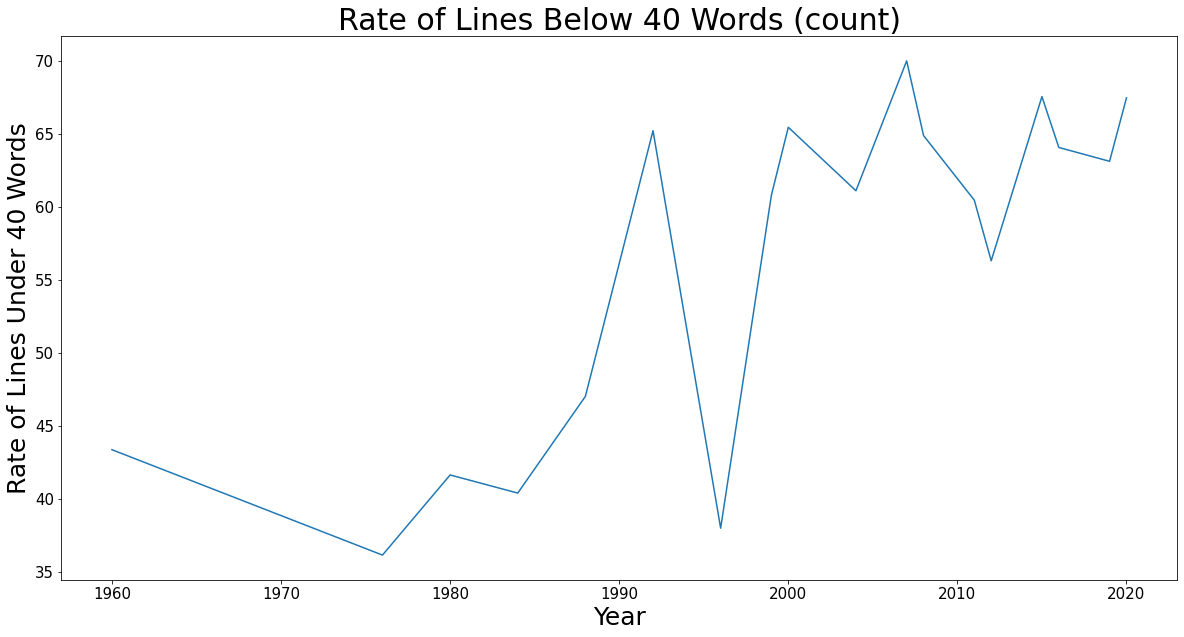

In [32]:
X = list(percent_df.index)
y_3 = list(percent_df['under_40_rate'])
plt.plot(X, y_3)
plt.xlabel('Year', size=25)
plt.ylabel('Rate of Lines Under 40 Words', size=25)
plt.title('Rate of Lines Below 40 Words (count)', size=30)
plt.xticks(size=15)
plt.yticks(size=15);

It makes sense this continues to go up, with the decreasing average line length.

### What is the Average Length of Response over time, by debate type?

In [164]:
type_time = speaker_df.groupby([speaker_df.Year, speaker_df.Debate_Type]).agg({'line_length':['mean']}).reset_index()

In [165]:
types = ['General-President', 'General-VP', 'Primary-Democrat', 'Primary-Republican'] 

In [166]:
type_time.head()

,Year,Debate_Type,line_length
,,,mean
0,1960,General-President,171.710938
1,1976,General-President,153.810219
2,1980,General-President,122.239234
3,1984,General-President,53.371634
4,1984,General-VP,120.058824


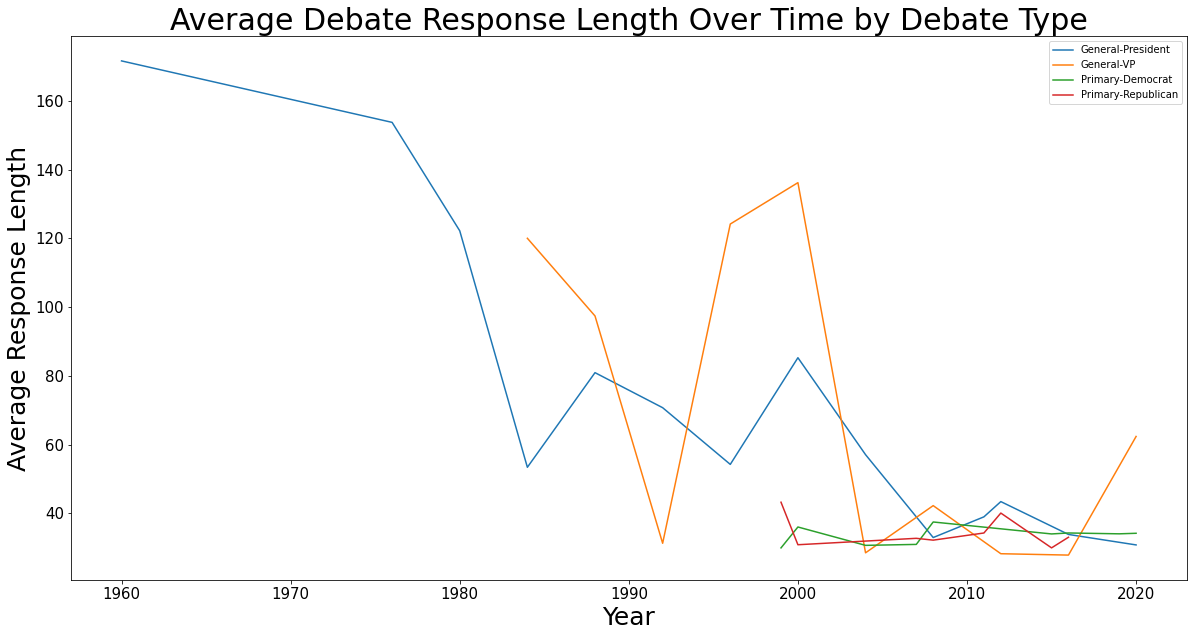

In [168]:
legend = []
for election_type in types:
    x = type_time[type_time.iloc[:, 1] == election_type].iloc[:, 0]
    y = type_time[type_time.iloc[:, 1] == election_type].iloc[:, 2]
    legend.append(type)
    plt.plot(x,y)
plt.xlabel('Year', size=25)
plt.ylabel('Average Response Length', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Debate Response Length Over Time by Debate Type', size=30)
plt.legend(('General-President', 'General-VP', 'Primary-Democrat', 'Primary-Republican'));

Primaries have always been lower, which make sense since there are so many candidates to debate.  However, even General election debates (Pres. and VP) have declined drastically over time.

### Are there any similar patterns for speaker type line length over time?

In [37]:
speaker_type_df = speaker_df.groupby([speaker_df.Year, speaker_df.Speaker_Type]).agg({'line_length':['mean']}).reset_index()

In [38]:
speaker_type_df.head()

,Year,Speaker_Type,line_length
,,,mean
0,1960,Democrat,293.677966
1,1960,Moderator/Other,56.598684
2,1960,Republican,400.622222
3,1976,Democrat,320.396552
4,1976,Moderator/Other,55.100629


In [39]:
speaker_type_df.head()

,Year,Speaker_Type,line_length
,,,mean
0,1960,Democrat,293.677966
1,1960,Moderator/Other,56.598684
2,1960,Republican,400.622222
3,1976,Democrat,320.396552
4,1976,Moderator/Other,55.100629


In [159]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

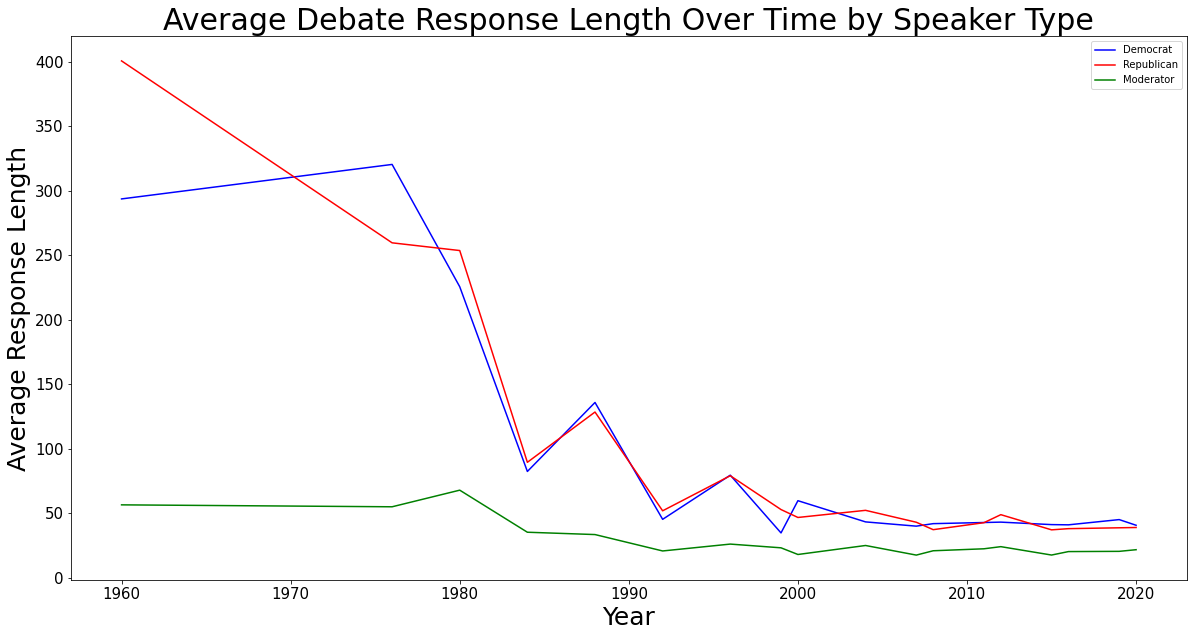

In [162]:
legend = []
for Speaker_Type in types:
    x = speaker_type_df[speaker_type_df.iloc[:, 1] == Speaker_Type].iloc[:, 0]
    y = speaker_type_df[speaker_type_df.iloc[:, 1] == Speaker_Type].iloc[:, 2]
    legend.append(type)
    if Speaker_Type == 'Republican':
        color = 'r'
    elif Speaker_Type == 'Democrat':
        color = 'b'
    else:
        color = 'g'
    plt.plot(x,y, color)
plt.xlabel('Year', size=25)
plt.ylabel('Average Response Length', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Debate Response Length Over Time by Speaker Type', size=30)
plt.legend(('Democrat', 'Republican', 'Moderator'));

It is interesting to see the moderator stay somewhat consistent, with republicans and democrats descending in a very similar fashion.

# Text Pre-Processing/NLP:

In [42]:
nlp_df = speaker_df.copy().reset_index(drop=True)

For this section, will utilize NLTK for NLP:

In [43]:
from __future__ import print_function
import nltk
import pandas as pd

Tokenizing the transcript text using nltk's word_tokenizer:

In [44]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

First, removing punctuation from the text and lower-casing all text:

In [45]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

nlp_df['no_punc'] = nlp_df.Transcript.map(alphanumeric).map(punc_lower)
nlp_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type,line_length,no_punc
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,234,lehrer good evening and welcome to the first...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992,Independent,197,perot i think the principal that separates me...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer governor clinton a one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992,Democrat,106,clinton the most important distinction in thi...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer president bush one minute response sir


Adding in a word tokenization column on the lowercased/punctuation removed column:

In [46]:
nlp_df['token'] = nlp_df['no_punc'].apply(word_tokenize)

Next, removing stop words from the tokenized column:

In [47]:
from nltk.corpus import stopwords

In [48]:
stop_words = stopwords.words('english')

Adding common punctuation to the stop words:

In [49]:
stop_words += ['.', ',', '(', ')', "'", '"', "!"]

Adding in some other common phrases I saw in the transcripts:

In [50]:
stop_words += ['president','senator','governor','representative',
               '[cheering and applause]','[begin videotape]','[end videotape]',
              '[speaking Spanish]','[applause]','[crosstalk]','...','—','[Speaking in Spanish]','[through translator]',
             '[inaudible] ','[laughter]','[moment of silence]','[the national anthem is performed]','[bell rings]', '[bell sound]', '[Applause]','(APPLAUSE)','(OFF-MIKE)','(From videotape.)','(Cheers, applause.)','(END VIDEO CLIP)'
             '(Laughter.)','(cheers)','--','(BEGIN AUDIO CLIP)','(END AUDIO CLIP)']

Finally, adding the speaker names to the stop_words, since these names are in the lines, and also won't really add much value to the text in my opinion.

In [51]:
stop_words += republicans
stop_words += democrats
stop_words += moderators 
stop_words += independents

Stop Word additions:

In [52]:
stop_words += ['government', 'said', 'uh', 'mr', 'year', 'want','american','state','country']

Removing stop words from the tokenized column:

In [53]:
nlp_df['no_stop_words'] = nlp_df['token'].apply(lambda x: [word for word in x if word not in stop_words])

In [54]:
nlp_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type,line_length,no_punc,token,no_stop_words
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,234,lehrer good evening and welcome to the first...,"[lehrer, good, evening, and, welcome, to, the,...","[good, evening, welcome, first, debates, among..."
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992,Independent,197,perot i think the principal that separates me...,"[perot, i, think, the, principal, that, separa...","[think, principal, separates, half, million, p..."
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer governor clinton a one minute response,"[lehrer, governor, clinton, a, one, minute, re...","[one, minute, response]"
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992,Democrat,106,clinton the most important distinction in thi...,"[clinton, the, most, important, distinction, i...","[important, distinction, campaign, represent, ..."
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer president bush one minute response sir,"[lehrer, president, bush, one, minute, respons...","[one, minute, response, sir]"


Lemmatizing the results tokenized words, to help reduce the number of words

In [55]:
lemma = nltk.stem.WordNetLemmatizer()

In [56]:
lemmed_list = []
for i, text in enumerate(nlp_df.no_stop_words):
    lemmed_words = [lemma.lemmatize(word) for word in text]
    lemmed_list.append(lemmed_words)
nlp_df['stemmed'] = lemmed_list


In [57]:
nlp_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Date_Time_Date,Year,Speaker_Type,line_length,no_punc,token,no_stop_words,stemmed
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,234,lehrer good evening and welcome to the first...,"[lehrer, good, evening, and, welcome, to, the,...","[good, evening, welcome, first, debates, among...","[good, evening, welcome, first, debate, among,..."
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992-10-11,1992,Independent,197,perot i think the principal that separates me...,"[perot, i, think, the, principal, that, separa...","[think, principal, separates, half, million, p...","[think, principal, separate, half, million, pe..."
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer governor clinton a one minute response,"[lehrer, governor, clinton, a, one, minute, re...","[one, minute, response]","[one, minute, response]"
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992-10-11,1992,Democrat,106,clinton the most important distinction in thi...,"[clinton, the, most, important, distinction, i...","[important, distinction, campaign, represent, ...","[important, distinction, campaign, represent, ..."
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992-10-11,1992,Moderator/Other,7,lehrer president bush one minute response sir,"[lehrer, president, bush, one, minute, respons...","[one, minute, response, sir]","[one, minute, response, sir]"


Now that the text has been word tokenized and preprocessed, converting back to string and vectorizing to create a document-term Matrix 

In [58]:
new_df = nlp_df['stemmed'].reset_index()

In [59]:
new_df

,index,stemmed
0,0,"[good, evening, welcome, first, debate, among,..."
1,1,"[think, principal, separate, half, million, pe..."
2,2,"[one, minute, response]"
3,3,"[important, distinction, campaign, represent, ..."
4,4,"[one, minute, response, sir]"
...,...,...
76447,76447,"[look, going, abide, commission, rule, call, p..."
76448,76448,"[whatever, rule, set, confident, cleveland, cl..."
76449,76449,[expect]
76450,76450,[expect]


In [60]:
new_df['string'] = 0
for i, text in enumerate(new_df['stemmed']):
    new_df.iloc[i, 2] = ' '.join(text)
new_df.head()

,index,stemmed,string
0,0,"[good, evening, welcome, first, debate, among,...",good evening welcome first debate among major ...
1,1,"[think, principal, separate, half, million, pe...",think principal separate half million people c...
2,2,"[one, minute, response]",one minute response
3,3,"[important, distinction, campaign, represent, ...",important distinction campaign represent real ...
4,4,"[one, minute, response, sir]",one minute response sir


Before vectorizing, only counting ones with 10 or more words in the stemmed list (accounting for brief statements taht wouldn't have any topics:

In [61]:
new_df['line_length'] = 0
for i, text in enumerate(new_df.line_length):
    new_df['line_length'].iloc[i] = len(new_df.stemmed.iloc[i])

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Pickling this df to use:

In [62]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

In [63]:
with open('Data/cleaned_string_df.pickle', 'wb') as to_write:
    pickle.dump(new_df, to_write)

## Count Vectorizer:

For the first round of topic modeling, I will try using count vectorizer.  Initializing Count Vectorizer:

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

In [65]:
X = new_df[new_df.line_length >= 40]['string']
cv_model = count_vectorizer.fit_transform(X)

In [66]:
term_document_matrix = pd.DataFrame(cv_model.toarray(), columns=count_vectorizer.get_feature_names())

In [67]:
term_document_matrix.shape

(4439, 12835)

In [68]:
term_document_matrix.head()

,aaa,aah,aapi,aarp,aayuh,abandon,abandoned,abandoning,abandonment,abc,...,zeroing,zimbabwe,zion,zip,zippo,zone,zoning,zoom,zubowski,³who
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Topic Modeling
From here, I'll move into topic modeling using NMF.  I'll start with a k of 5, to represent topics I expect to see:
- Foreign Policy
- Economy
- Domestic Social Issues
- Immigration
- Catch-All: (i.e. all others, possibly guns, election related words, etc.)

In [69]:
from sklearn.decomposition import NMF

Initializing the NMF Model:

In [70]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [71]:
doc_topic = nmf_model.fit_transform(term_document_matrix)
doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(4439, 5)

Pulling the top 10 words for each of the k topics:

In [72]:
words = count_vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-10:]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['policy',
  'time',
  'war',
  'believe',
  'administration',
  'year',
  'america',
  'world',
  'united',
  'state'],
 ['family',
  'dollar',
  'billion',
  'pay',
  'plan',
  'income',
  'money',
  'percent',
  'cut',
  'tax'],
 ['thing',
  'million',
  'job',
  'make',
  'work',
  'need',
  'know',
  'care',
  'health',
  'people'],
 ['thing',
  'way',
  'security',
  'got',
  'job',
  'sure',
  'know',
  'say',
  'make',
  'going'],
 ['ought',
  'child',
  'way',
  'say',
  'know',
  'thing',
  'right',
  'make',
  'school',
  'think']]

Changes made from the above:
- Added the following to stop word list: government, said, uh, mr, year, want; changed k from 5 to 6
- Added America, Country, and State to stop words

### Trying w/ N-Grams

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

In [74]:
X = new_df[new_df.line_length >= 30]['string']
cv_model = count_vectorizer.fit_transform(X)

In [75]:
term_document_matrix = pd.DataFrame(cv_model.toarray(), columns=count_vectorizer.get_feature_names())

In [76]:
term_document_matrix.shape

(10278, 15694)

In [77]:
term_document_matrix.head()

,aa,aaa,aah,aapi,aaron,aarp,aayuh,abandon,abandoned,abandoning,...,zion,zip,zippo,zone,zoning,zoom,zubowski,³mr,³well,³who
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Topic Modeling
From here, I'll move into topic modeling using NMF.  I'll start with a k of 5, to represent topics I expect to see:
- Foreign Policy
- Economy
- Domestic Social Issues
- Immigration
- Catch-All: (i.e. all others, possibly guns, election related words, etc.)

In [78]:
from sklearn.decomposition import NMF

Initializing the NMF Model:

In [79]:
nmf_model = NMF(5)

Topics from the relating model, for each line:

In [80]:
doc_topic = nmf_model.fit_transform(term_document_matrix)
doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(10278, 5)

Pulling the top 10 words for each of the k topics:

In [81]:
words = count_vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-10:]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['need',
  'administration',
  'war',
  'time',
  'believe',
  'year',
  'america',
  'world',
  'united',
  'state'],
 ['rate',
  'family',
  'billion',
  'pay',
  'money',
  'plan',
  'income',
  'percent',
  'cut',
  'tax'],
 ['like',
  'make',
  'job',
  'million',
  'need',
  'work',
  'know',
  'health',
  'care',
  'people'],
 ['security',
  'thing',
  'got',
  'way',
  'job',
  'sure',
  'know',
  'say',
  'make',
  'going'],
 ['say',
  'important',
  'right',
  'make',
  'way',
  'ought',
  'thing',
  'school',
  'know',
  'think']]

Topic modelling using TD-IDF vectorization will be in the **tf-idf_vectorizer_topic_modeling.ipynb** notebook.

# VADER Sentiment Analysis

In order to get a sense of sentiment analysis, I'll be using VADER on the text.

In [95]:
texts = nlp_df['Transcript']

In [85]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/patrickbovard/nltk_data...


True

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Initializing the sentiment analyzer:

In [87]:
sent_analyzer = SentimentIntensityAnalyzer()

Creating a new df to run the analysis on and add the scores to:

In [97]:
sentiment_df = nlp_df.iloc[:, 0:9].copy()

In [99]:
sentiment_df['Negative'] = 0
sentiment_df['Neutral'] = 0
sentiment_df['Positive'] = 0
sentiment_df['Compound'] = 0

Looping through the new df to add the sentiment scores:

In [102]:
for i, text in enumerate(sentiment_df['Transcript']):
    sentiment = sent_analyzer.polarity_scores(text)
    sentiment_df.iloc[i, 9] = sentiment['neg']
    sentiment_df.iloc[i, 10] = sentiment['neu']
    sentiment_df.iloc[i, 11] = sentiment['pos']
    sentiment_df.iloc[i, 12] = sentiment['compound']

In [112]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76452 entries, 0 to 76451
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Debate_Name     76452 non-null  object        
 1   Transcript      76452 non-null  object        
 2   Speaker         76452 non-null  object        
 3   Data_Source     76452 non-null  object        
 4   Debate_Type     76452 non-null  object        
 5   Date_Time_Date  76452 non-null  datetime64[ns]
 6   Year            76452 non-null  int64         
 7   Speaker_Type    76452 non-null  object        
 8   line_length     76452 non-null  int64         
 9   Negative        76452 non-null  float64       
 10  Neutral         76452 non-null  float64       
 11  Positive        76452 non-null  float64       
 12  Compound        76452 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 7.6+ MB


## EDA w/ Sentiments

Has the sentiment for each party stayed relatively similar over time?

In [153]:
sent_over_time = sentiment_df[sentiment_df.line_length >= 30].groupby([sentiment_df.Year, sentiment_df.Speaker_Type]).agg({'Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

In [154]:
sent_over_time.head()

,Year,Speaker_Type,Negative,Positive,Neutral
0,1960,Democrat,0.053500,0.108620,0.837960
1,1960,Moderator/Other,0.036586,0.078000,0.885448
2,1960,Republican,0.054744,0.102465,0.842744
3,1976,Democrat,0.068094,0.102943,0.829000
4,1976,Moderator/Other,0.047712,0.073699,0.878644


In [155]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

In [156]:
sentiments = ['Negative', 'Positive', 'Neutral']

Using Subplots:

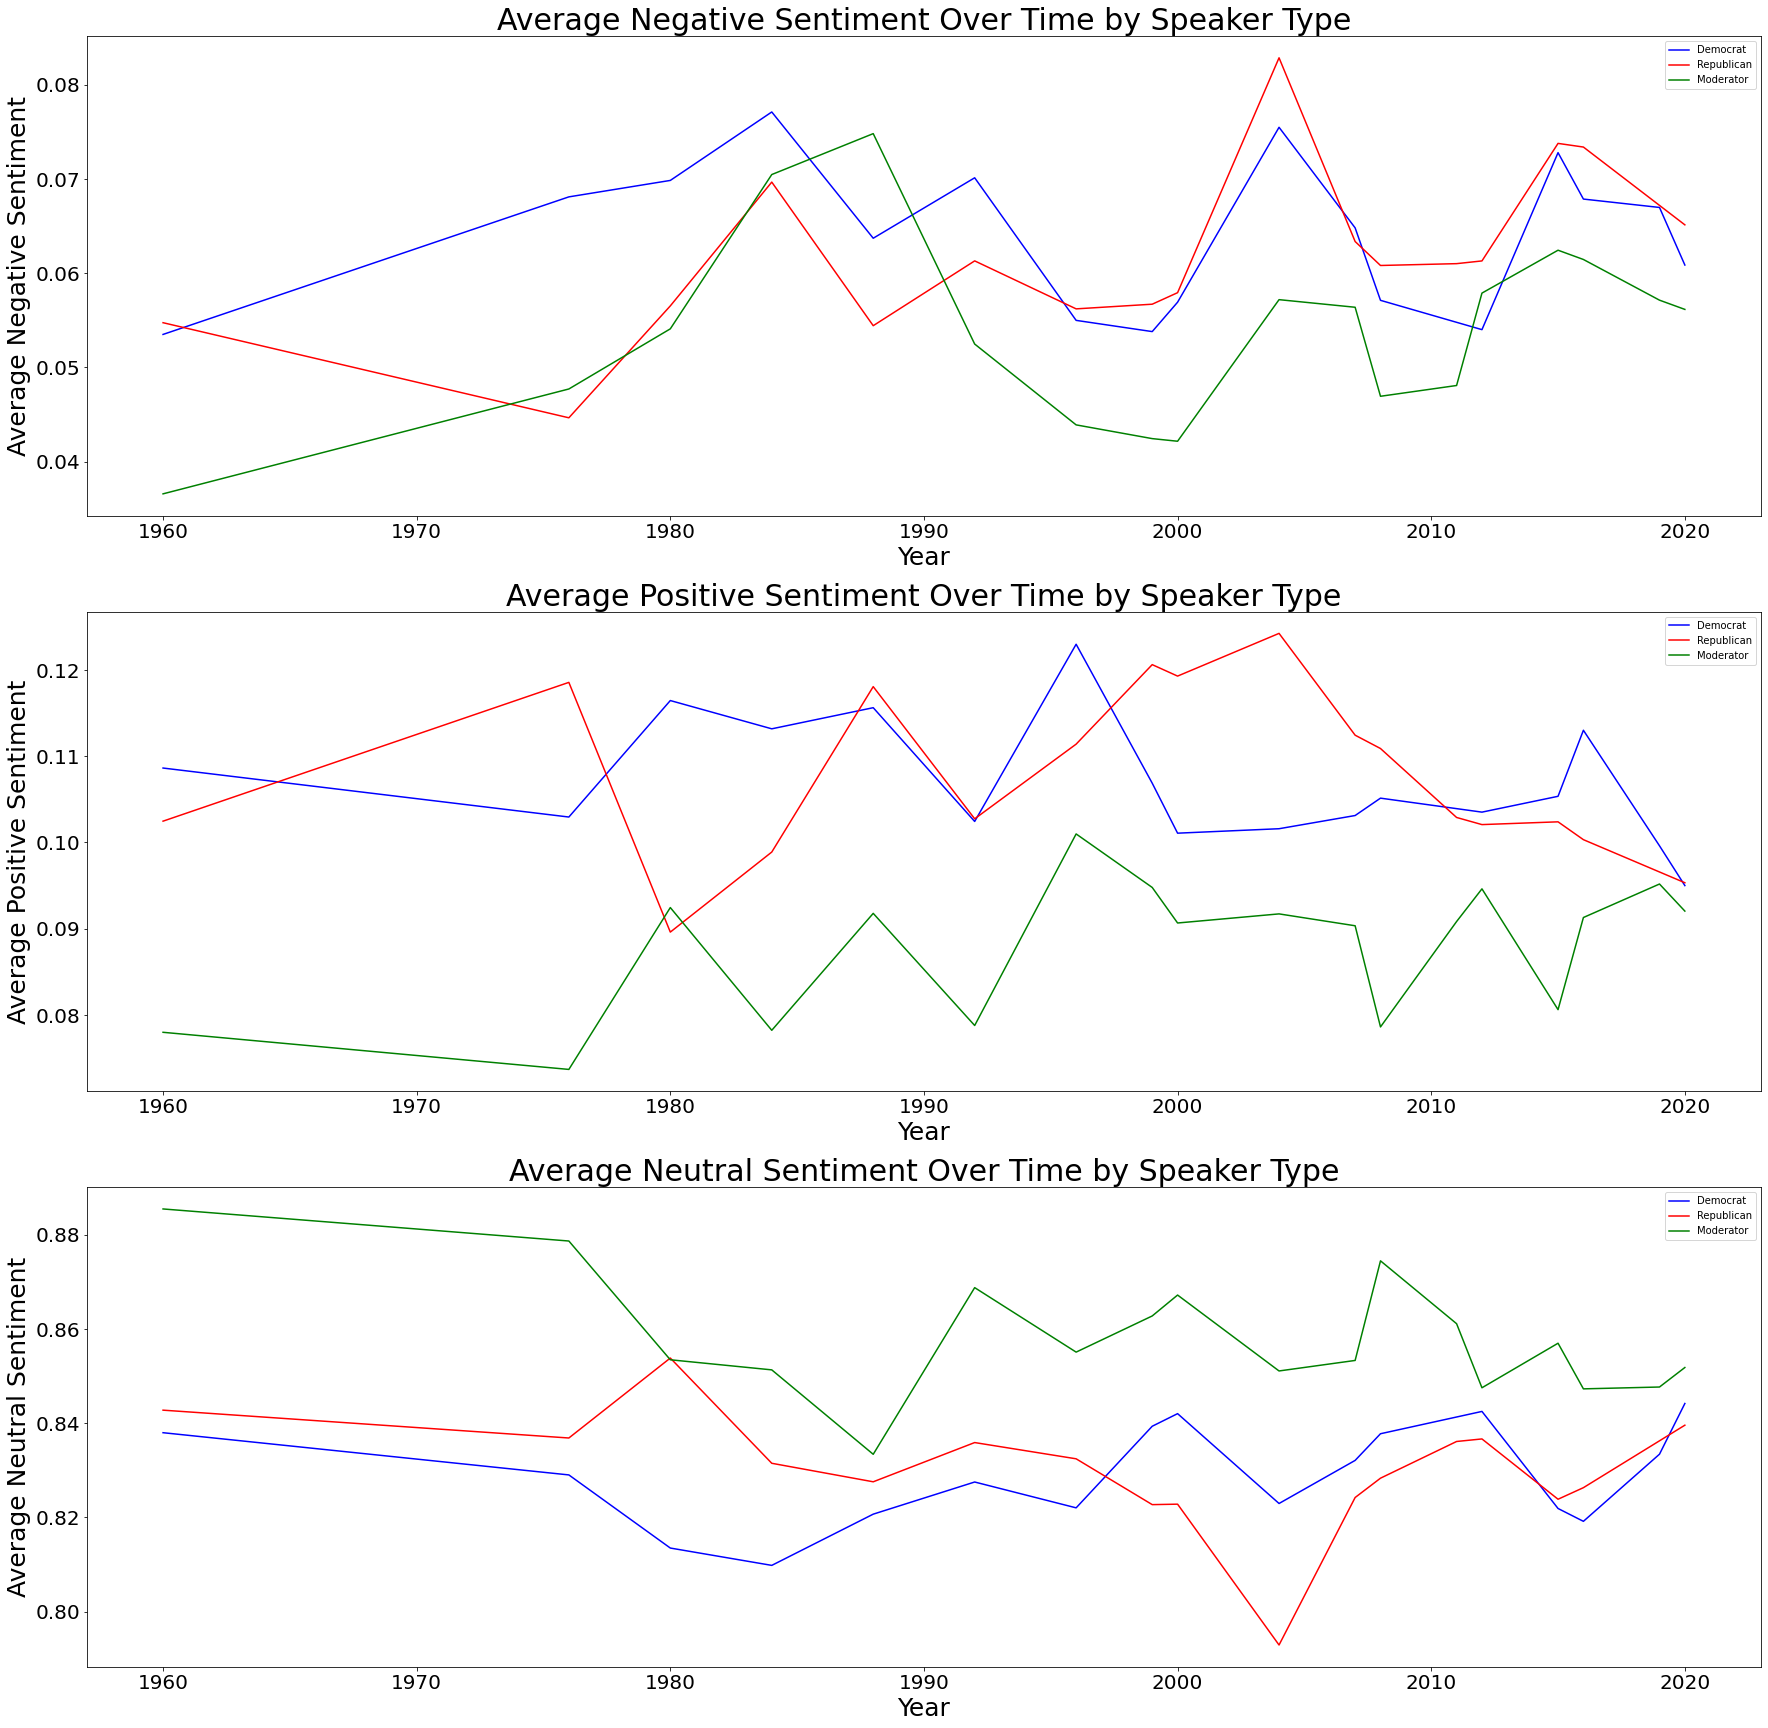

In [157]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for Speaker_Type in types:
        x = sent_over_time[sent_over_time.iloc[:, 1] == Speaker_Type].iloc[:, 0]
        y = sent_over_time[sent_over_time.iloc[:, 1] == Speaker_Type].loc[:, sentiment]
        legend.append(type)
        if Speaker_Type == 'Republican':
            color = 'r'
        elif Speaker_Type == 'Democrat':
            color = 'b'
        else:
            color = 'g'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Speaker Type'.format(sentiment), size=30)
    plt.legend(('Democrat', 'Republican', 'Moderator'))

Who are the most positive and negative candidates?

In [149]:
candidate_sents = sentiment_df[(sentiment_df.line_length >= 20) & ((sentiment_df.Speaker_Type == 'Republican')|(sentiment_df.Speaker_Type == 'Democrat'))].groupby([sentiment_df.Speaker]).agg({'Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

In [170]:
candidate_sents.sort_values(by='Negative', ascending=False).head(10)

,Speaker,Negative,Positive,Neutral
85,"senator jim demint (r), south carolina",0.126000,0.055000,0.819000
41,gravel,0.106951,0.089993,0.803091
91,swalwell,0.099375,0.083750,0.816875
33,gabbard,0.097124,0.116000,0.786854
40,graham,0.092548,0.112538,0.794941
69,paul,0.092126,0.091690,0.816187
68,pataki,0.089048,0.106964,0.804036
17,chafee,0.087313,0.097562,0.815187
22,cruz,0.084579,0.096980,0.818474
8,booker,0.083380,0.111674,0.804913


In [171]:
candidate_sents.sort_values(by='Positive', ascending=False).head(10)

,Speaker,Negative,Positive,Neutral
89,steve forbes,0.055421,0.141000,0.803474
47,inslee,0.067650,0.140525,0.791800
73,president bush,0.081180,0.132941,0.785867
60,mccain,0.065051,0.129439,0.805518
11,bush,0.060969,0.128720,0.810316
59,lieberman,0.077690,0.127632,0.794724
67,palin,0.053940,0.126910,0.819188
66,orrin hatch,0.049950,0.126200,0.823900
71,pence,0.058244,0.124386,0.817352
27,dukakis,0.061561,0.123929,0.814459


In [172]:
candidate_sents.sort_values(by='Neutral', ascending=False).head(10)

,Speaker,Negative,Positive,Neutral
48,j. king,0.012333,0.086857,0.900714
72,perry,0.045761,0.093447,0.860817
29,ferraro,0.063815,0.076815,0.859519
95,walker,0.054689,0.086475,0.858836
4,bennet,0.054980,0.087860,0.857120
82,sen thompson,0.063317,0.079610,0.857024
9,bradley,0.051191,0.092436,0.856361
57,klobuchar,0.041622,0.105451,0.852924
34,gary bauer,0.046762,0.102476,0.850762
6,biden,0.061773,0.087685,0.850551


### What about sentiment for winning or losing?

For this, I'll add a column for winner/vs non-winner of a particular election.

In [176]:
sentiment_df['Election_Result'] = ""

Looping through the General-President and Primary speakers to add winners/loser labels (not adding VP at this time, since the president is typically who people are voting for more strongly):

In [192]:
for i, speaker in enumerate(sentiment_df.Speaker):
    #Adding an n/a for moderators and the VP candidates:
    if sentiment_df.iloc[i].Speaker_Type == 'Moderator/Other' or sentiment_df.iloc[i].Debate_Type == 'General-VP':
        sentiment_df.iloc[i, 13] = 'n/a'
        
    #Looping through Presidential Election Results Winners:
    elif sentiment_df.iloc[i].Debate_Type == 'General-President':
        if sentiment_df.iloc[i].Year == 2016:
            if 'trump' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2020:
            if 'biden' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'     
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2012 or sentiment_df.iloc[i].Year == 2008:
            if 'obama' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 1988 or sentiment_df.iloc[i].Year == 2000 or sentiment_df.iloc[i].Year == 2004:
            if 'bush' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'  
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 1996 or sentiment_df.iloc[i].Year == 1992:
            if 'clinton' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 1980 or sentiment_df.iloc[i].Year == 1984:
            if 'reagan' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 1976:
            if 'carter' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 1960:
            if 'kennedy' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
                
    #Looping through Democrat Primary Election Results Winners:
    elif sentiment_df.iloc[i].Debate_Type == 'Primary-Democrat':
        if sentiment_df.iloc[i].Year == 2016:
            if 'clinton' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2020:
            if 'biden' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'     
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2008:
            if 'obama' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2004:
            if 'kerry' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'  
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2000:
            if 'gore' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'  
            else:
                sentiment_df.iloc[i, 13] = 'Loser'

#Looping through Democrat Primary Election Results Winners:
    elif sentiment_df.iloc[i].Debate_Type == 'Primary-Republican':
        if sentiment_df.iloc[i].Year == 2016:
            if 'trump' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2012:
            if 'romney' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'     
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2008:
            if 'mccain' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner' 
            else:
                sentiment_df.iloc[i, 13] = 'Loser'
        elif sentiment_df.iloc[i].Year == 2000:
            if 'bush' in speaker:
                sentiment_df.iloc[i, 13] = 'Winner'  
            else:
                sentiment_df.iloc[i, 13] = 'Loser'

In [201]:
result_sent_over_time = sentiment_df[sentiment_df.line_length >= 30].groupby([sentiment_df.Year, sentiment_df.Debate_Type, sentiment_df.Election_Result]).agg({'Negative':'mean', 'Positive':'mean', 'Neutral':'mean'}).reset_index()

In [202]:
result_sent_over_time.head()

,Year,Debate_Type,Election_Result,Negative,Positive,Neutral
0,1960,General-President,Loser,0.055229,0.100333,0.844458
1,1960,General-President,Winner,0.052844,0.111578,0.835600
2,1960,General-President,n/a,0.036586,0.078000,0.885448
3,1976,General-President,Loser,0.044655,0.118545,0.836836
4,1976,General-President,Winner,0.068094,0.102943,0.829000


Plotting out by election type, over time:

General Election (President):

In [207]:
results = ['Winner', 'Loser'] 

In [208]:
sentiments = ['Negative', 'Positive', 'Neutral']

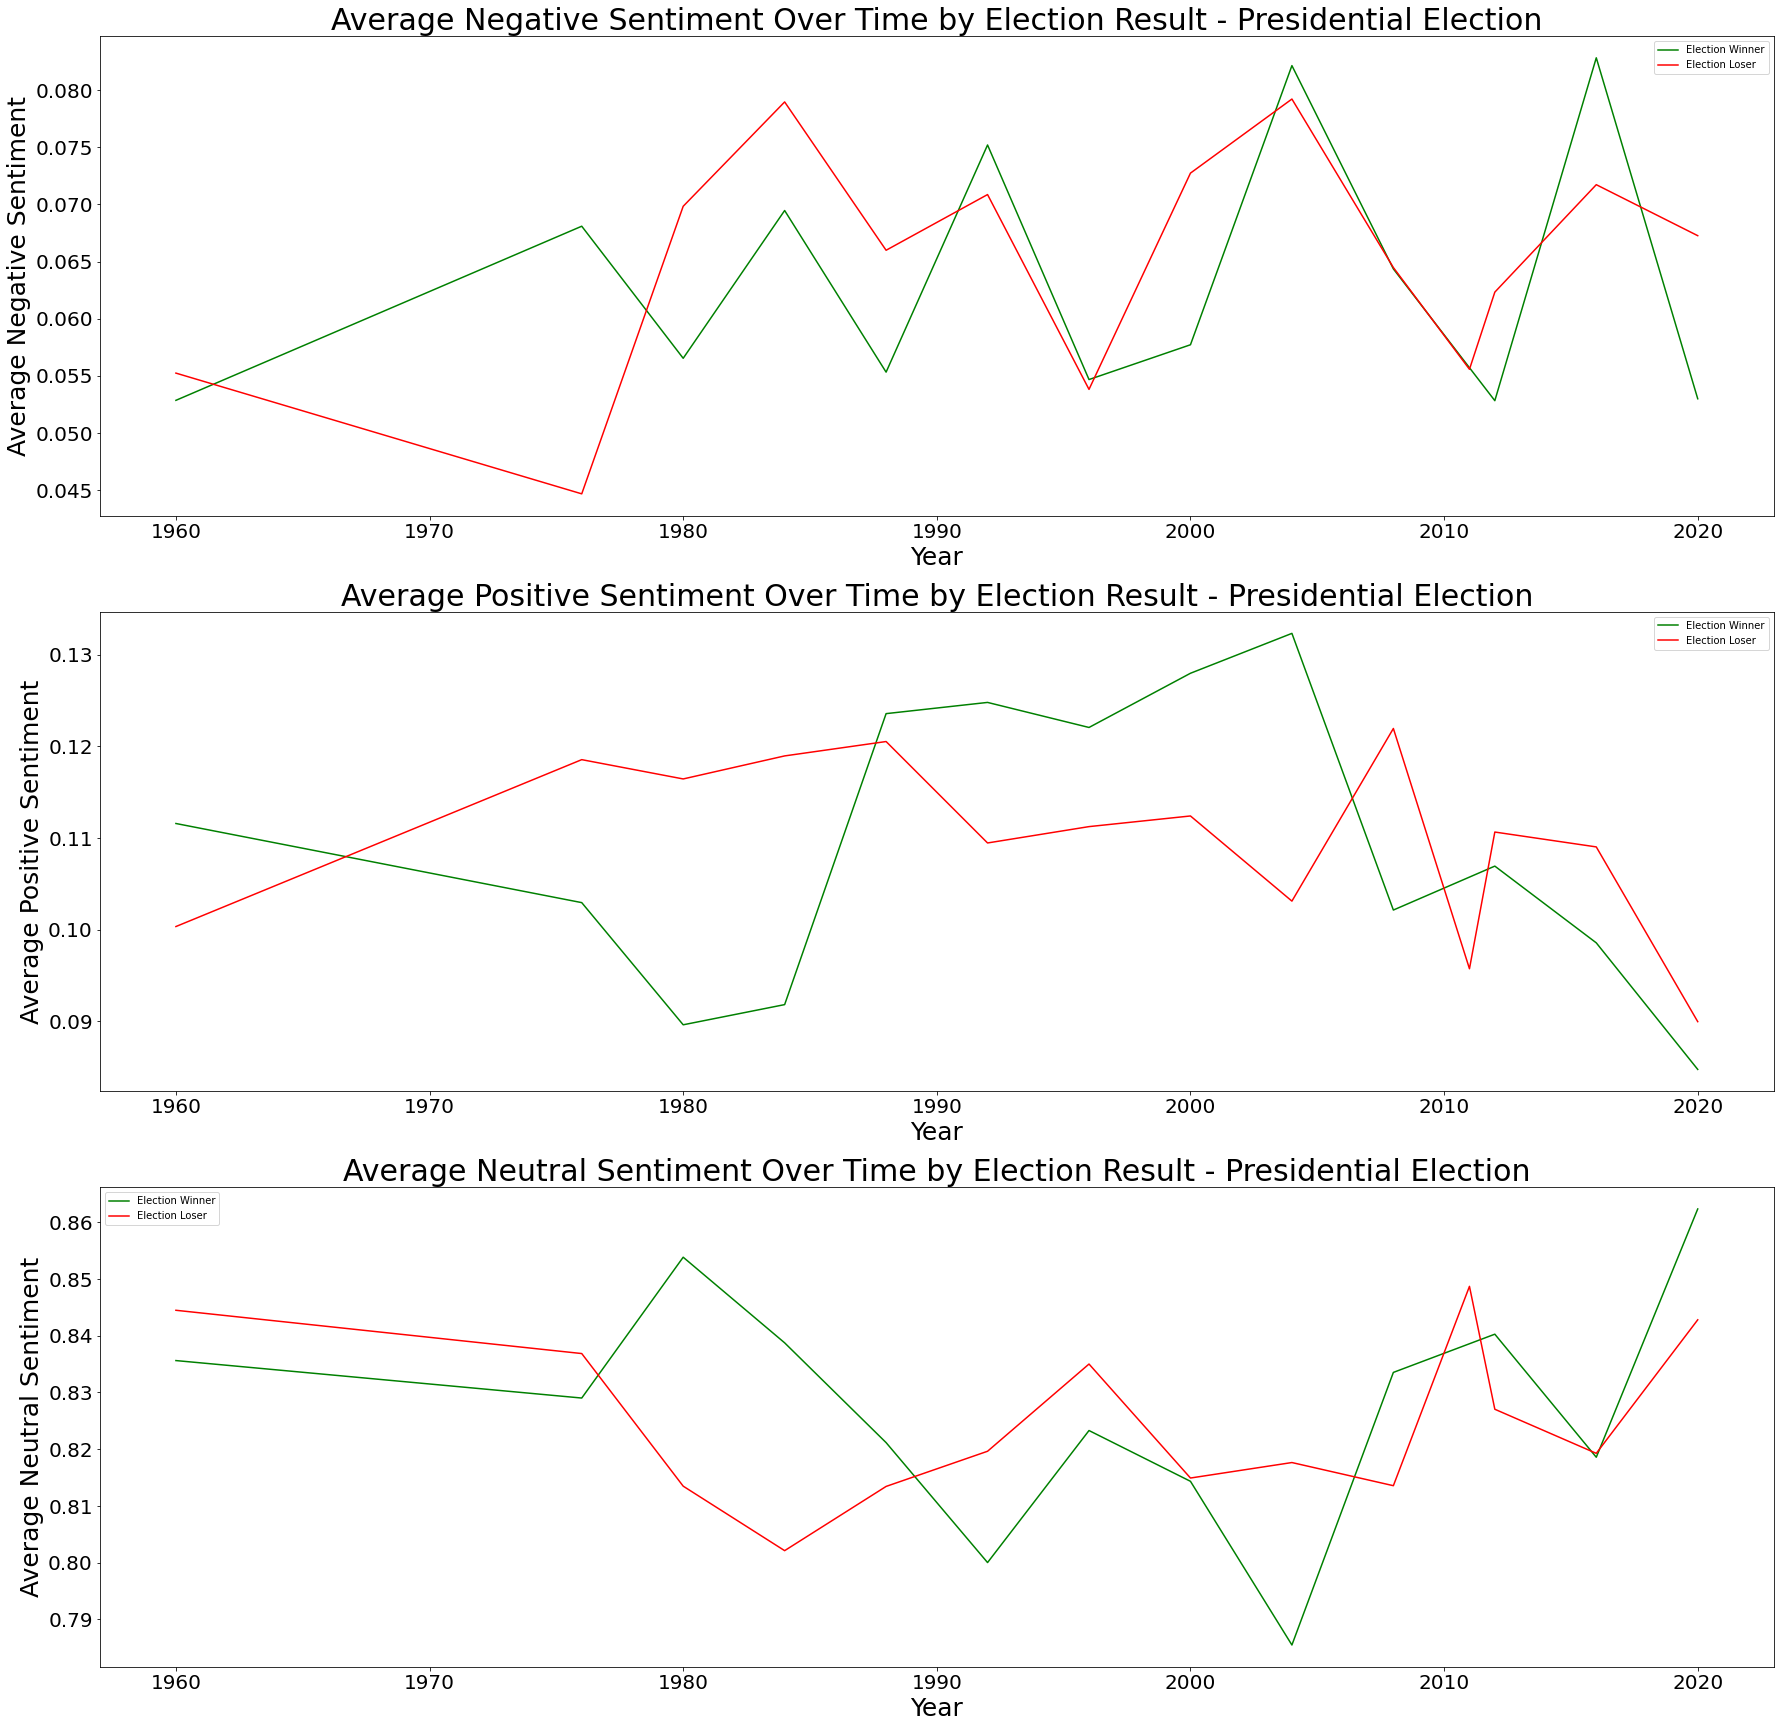

In [219]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'General-President') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'General-President') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'g'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Presidential Election'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))

Republican Primaries:

In [212]:
results = ['Winner', 'Loser'] 

In [213]:
sentiments = ['Negative', 'Positive', 'Neutral']

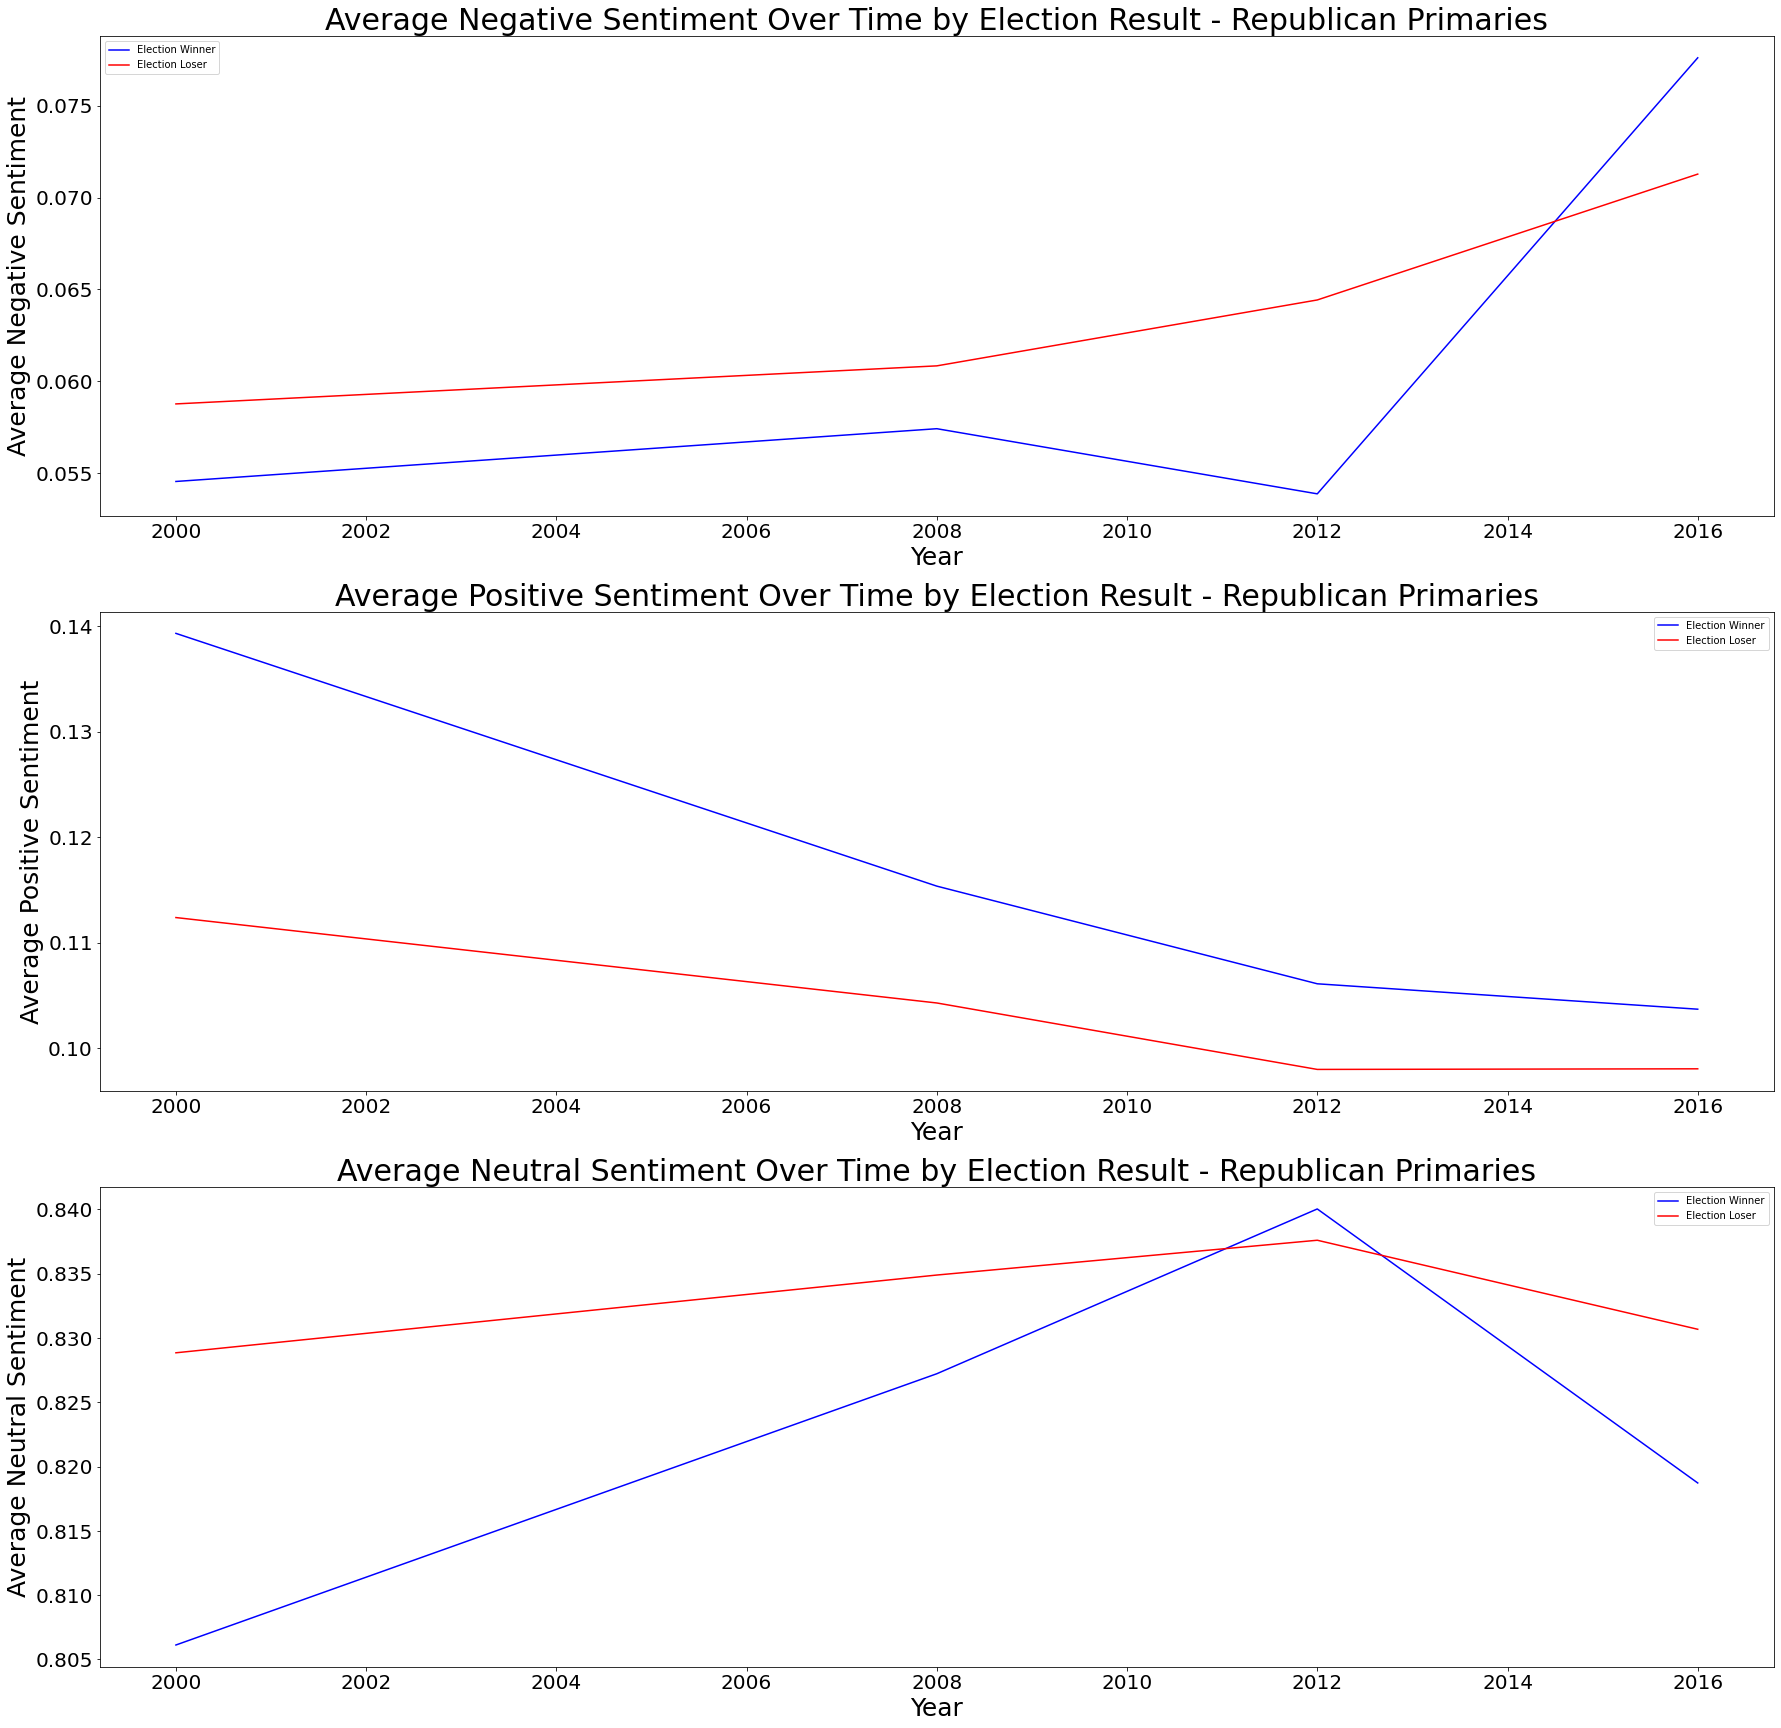

In [214]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Republican') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Republican') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'b'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Republican Primaries'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))

Democrat Primaries:

In [216]:
results = ['Winner', 'Loser'] 

In [217]:
sentiments = ['Negative', 'Positive', 'Neutral']

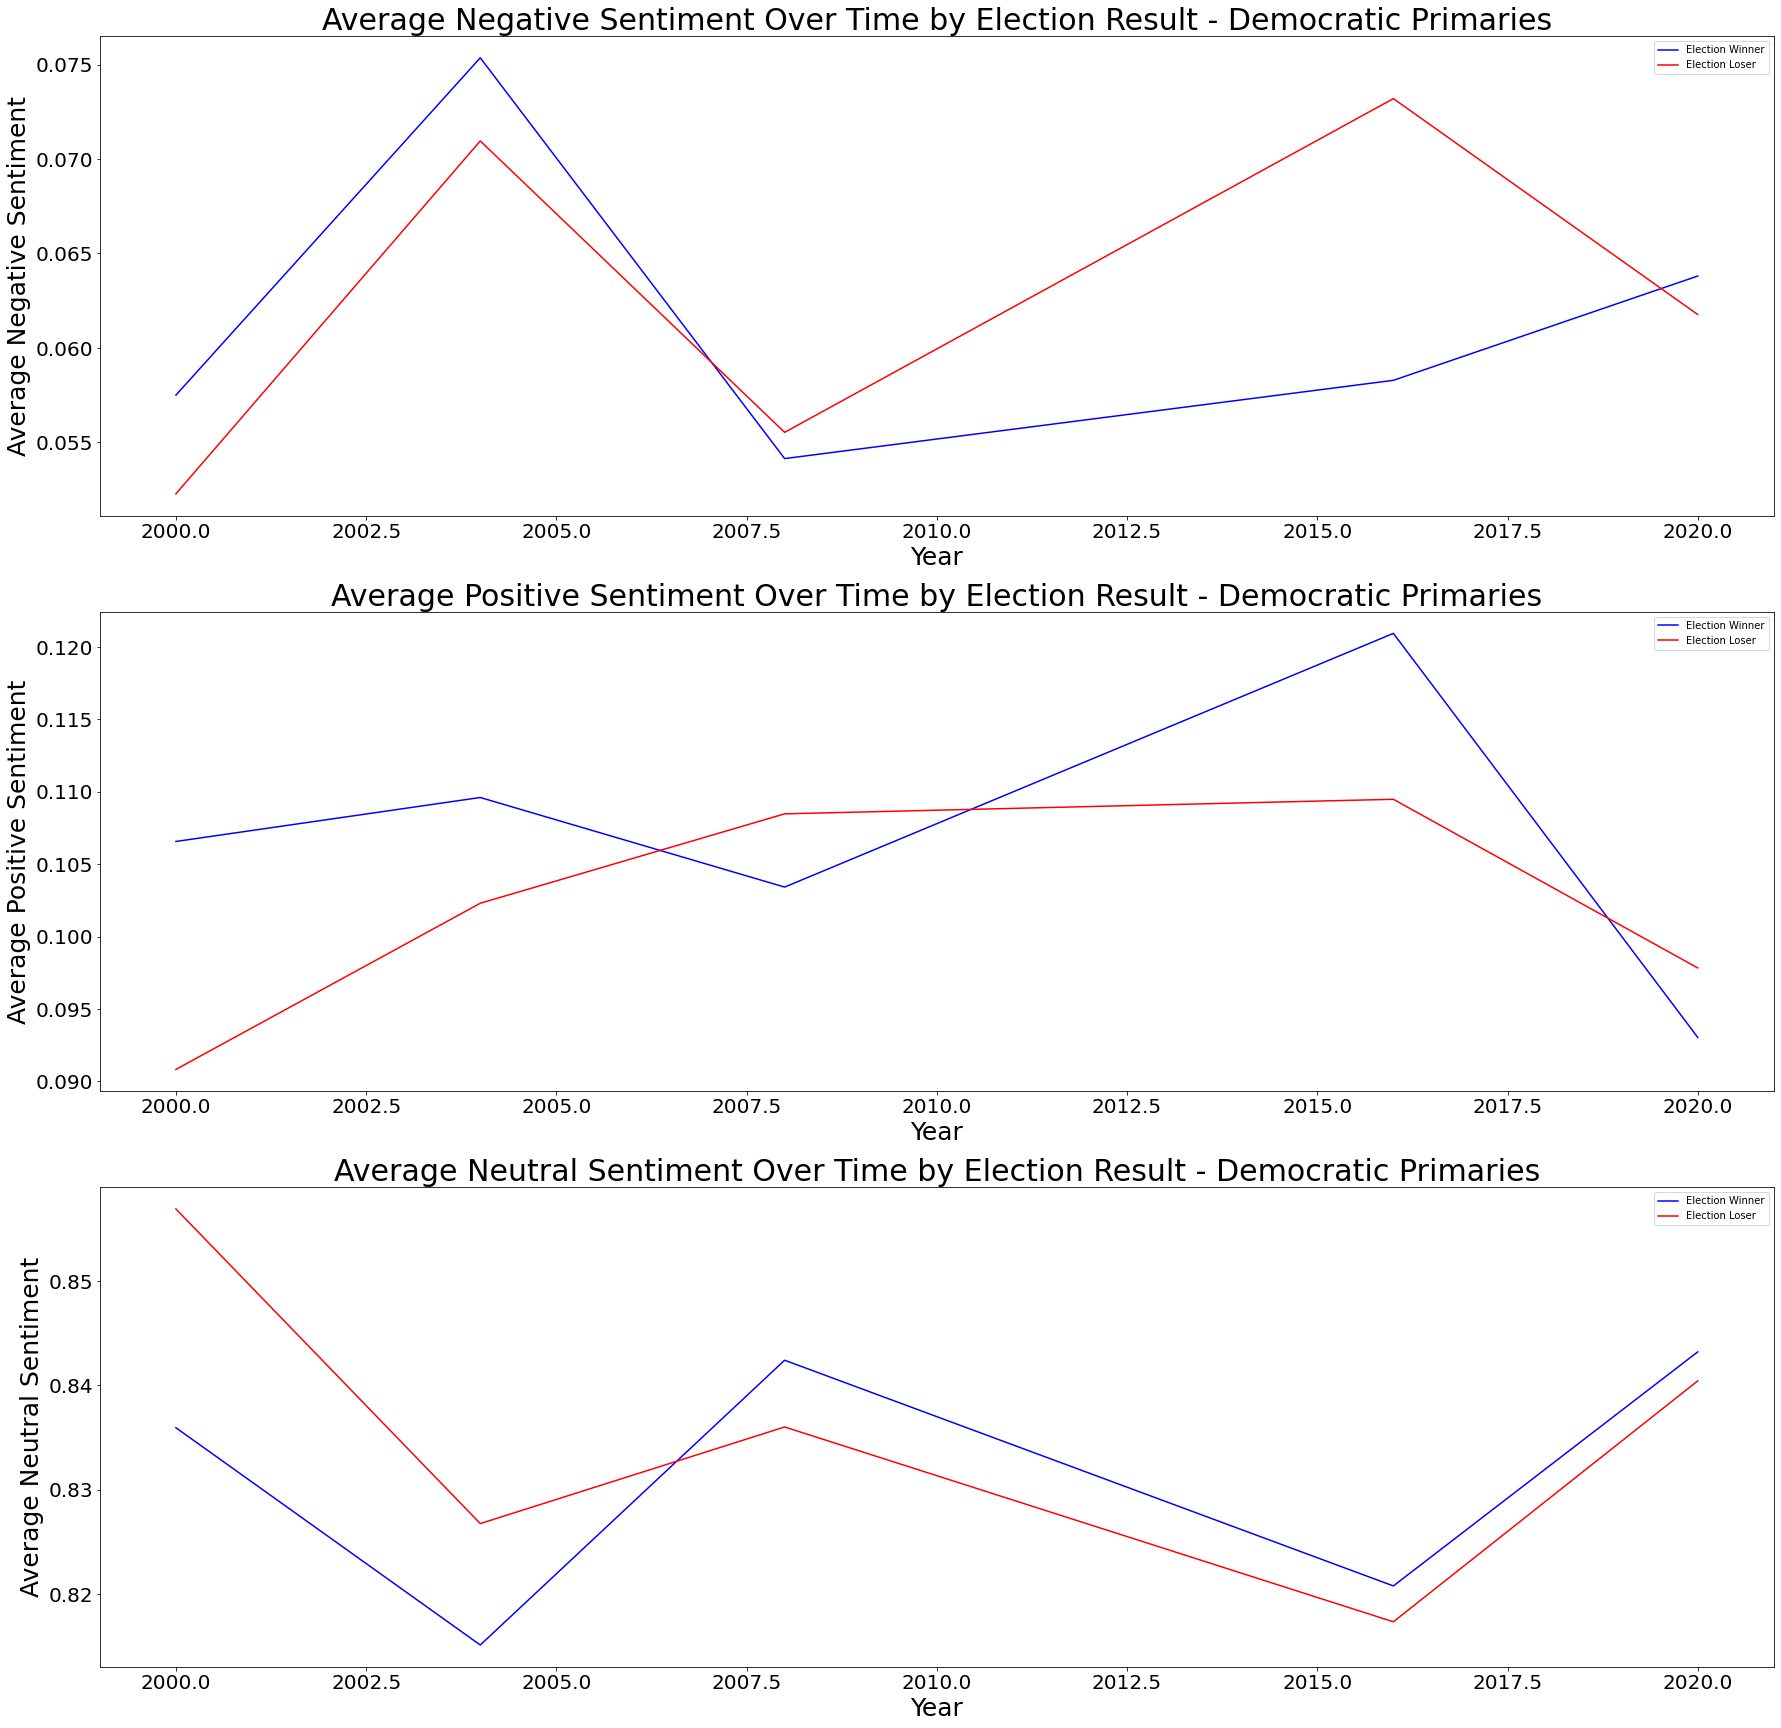

In [218]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, sentiment in enumerate(sentiments, 1):
    plt.subplot(3,1,i)
    for result in results:
        x = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Democrat') & (result_sent_over_time.iloc[:, 2] == result)].iloc[:, 0]
        y = result_sent_over_time[(result_sent_over_time.Debate_Type == 'Primary-Democrat') & (result_sent_over_time.iloc[:, 2] == result)].loc[:, sentiment]
        legend.append(type)
        if result == 'Winner':
            color = 'b'
        else:
            color = 'r'
        plt.plot(x,y, color)
    plt.xlabel('Year', size=25)
    plt.ylabel('Average {} Sentiment'.format(sentiment), size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average {} Sentiment Over Time by Election Result - Democratic Primaries'.format(sentiment), size=30)
    plt.legend(('Election Winner', 'Election Loser'))